In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv(r'C:\Users\peret\Desktop\ML_Otus\hw-6\AB_NYC_2019\AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape

(48895, 16)

In [5]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1) # Отбросим ненужные признаки

In [6]:
df.shape

(48895, 11)

In [7]:
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


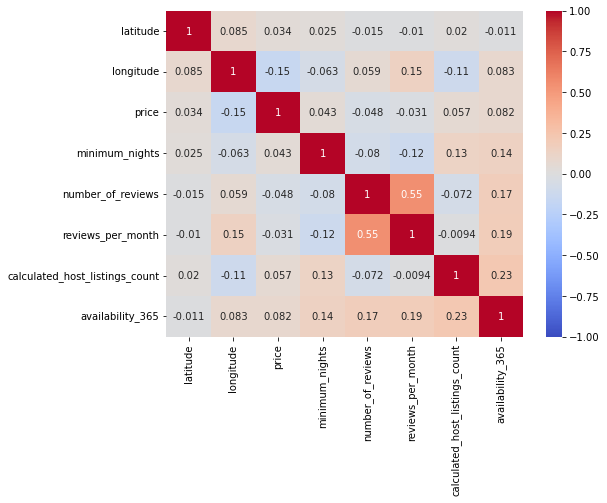

In [15]:
# Построим Тепловую матрицу корреляции между признаками
matrix = np.triu(df.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.2g')
plt.show()

In [16]:
df = df.drop(['reviews_per_month'], axis=1) # number_of_reviews и reviews_per_month взаимокоррелирующие, удалим один

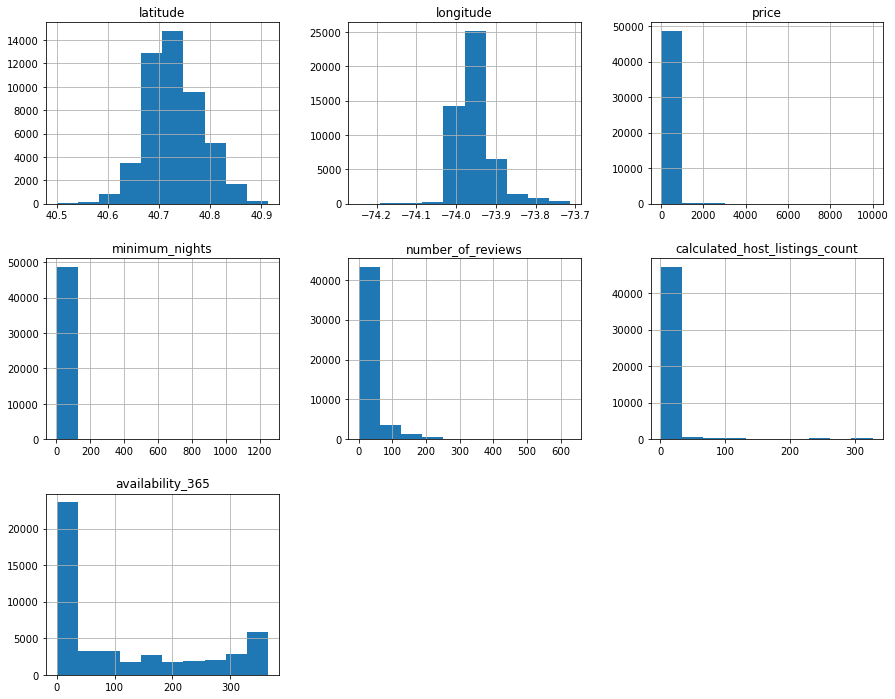

In [17]:
# Исследование с помощью гистограммы частот
df.hist(figsize=(15, 12));

<Figure size 1080x720 with 0 Axes>

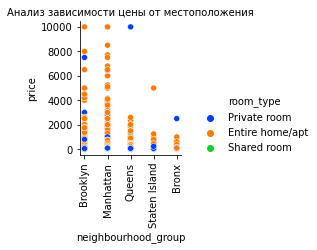

In [18]:
# Анализ зависимости между характеристиками (влияние местоположения на стоимость)
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='room_type', y_vars=['price'], x_vars=['neighbourhood_group'], palette='bright')
plt.xticks(rotation=90)
plt.title("Анализ зависимости цены от местоположения", size=10);

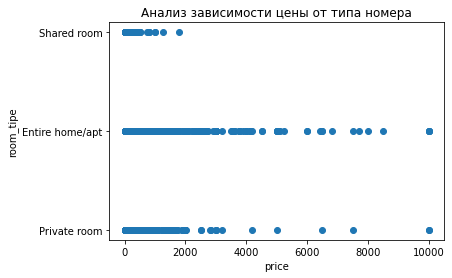

In [19]:
plt.scatter(df.price,df.room_type)
plt.xlabel('price')
plt.ylabel('room_tipe')
plt.title('Анализ зависимости цены от типа номера');

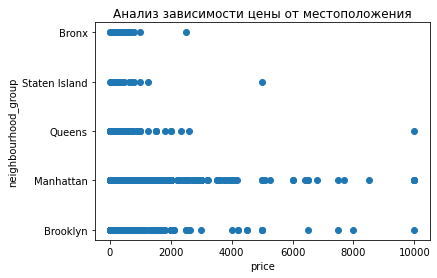

In [20]:
plt.scatter(df.price,df.neighbourhood_group)
plt.xlabel('price')
plt.ylabel('neighbourhood_group')
plt.title('Анализ зависимости цены от местоположения');

In [21]:
df_hot_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
df_hot_encoded.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Очистим данные от аномальных значений по целевой переменной
max_price = df_hot_encoded.price.quantile(0.95)
min_price = df_hot_encoded.price.quantile(0.05)
df1 = df_hot_encoded[(df_hot_encoded['price']<min_price) | (df_hot_encoded['price']> max_price)]
print("Выбросы по цене:",df1.shape[0])

Выбросы по цене: 4483


In [27]:
print("Before:",df_hot_encoded.shape)
df2 = df_hot_encoded[(df_hot_encoded['price']>min_price) & (df_hot_encoded['price']<max_price)]
print("After:",df2.shape)

Before: (48895, 236)
After: (43631, 236)


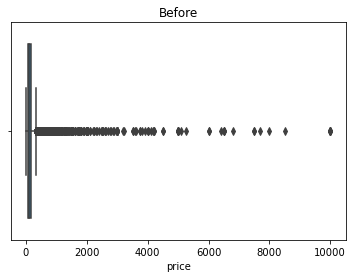

In [28]:
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(df_hot_encoded['price'], orient='v')
plt.title("Before")
plt.show();

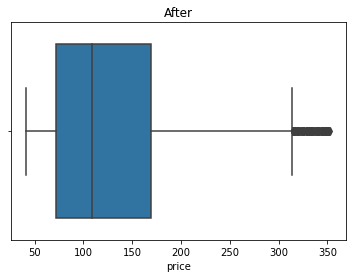

In [29]:
sns.boxplot(df2['price'], orient='v')
plt.title("After")
plt.show();

In [30]:
df2.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,...,43631.000000,43631.000000,43631.000000,43631.00000,43631.000000,43631.0,43631.000000,43631.000000,43631.000000,43631.000000
mean,40.729397,-73.952633,128.201187,6.850359,24.227017,6.752424,109.439917,0.019848,0.414040,0.446426,...,0.085169,0.000023,0.003438,0.00165,0.000183,0.0,0.004171,0.531686,0.453920,0.014393
std,0.054071,0.045249,70.515988,20.148614,45.666488,31.909715,130.068423,0.139480,0.492561,0.497127,...,0.279136,0.004787,0.058534,0.04059,0.013540,0.0,0.064452,0.499001,0.497878,0.119107
min,40.499790,-74.244420,41.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,40.690500,-73.982890,72.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,40.723110,-73.955730,109.000000,2.000000,6.000000,1.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
75%,40.763615,-73.937710,169.000000,5.000000,25.000000,2.000000,216.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000
max,40.911690,-73.712990,353.000000,1250.000000,629.000000,327.000000,365.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import model_selection, preprocessing, metrics

In [32]:
X = df2.drop('price', axis=1) # Подготовим данные для разбиения на обучающую и тестовую
y = df2['price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Гребневая регрессия - Метод Ridge
model_Ridge = RidgeCV()
model_Ridge.fit(X_train, y_train)
y_pred = model_Ridge.predict(X_test)

In [36]:
# Оценка качества модели Ridge
print("МAE", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2", r2_score(y_test, y_pred))

МAE 37.09694933409421
RMSE: 51.25588515248895
R2 0.46872602614457703


In [37]:
# Регрессия LASSO
model_Lasso = LassoCV()
model_Lasso.fit(X_train, y_train)
y_pred = model_Lasso.predict(X_test)

In [38]:
# Оценка качества модели Lasso
print("МAE", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2", r2_score(y_test, y_pred))

МAE 39.12753643598862
RMSE: 53.49206312819313
R2 0.4213582542967359


In [39]:
# ElasticNetCV
model_EN = ElasticNetCV()
model_EN.fit(X_train, y_train)
y_pred = model_EN.predict(X_test)

In [40]:
# Оценка качества модели ElasticNetCV
print("МAE", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2", r2_score(y_test, y_pred))

МAE 46.86636667889293
RMSE: 60.34794106265409
R2 0.2635284401780451


# Оптимальные показатели качества модели характерны для модели RidgCV